# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 

## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 

### Παπακωνσταντίνου Πολύβιος 03114892
### Πατρής Νικόλαος 03114861


## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset στο dataframe `df_data_1`: 

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ανάλογα με τον αριθμό (seed) που το έχει ανατεθεί στο `spreadsheets`. Στην περίπτωση μας ο αριθμός είναι 30.

In [10]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

In [11]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 30

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [7]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['A Very Long Engagement']
['"World cinema",  "Period piece",  "Drama",  "War film",  "Romantic drama",  "Romance Film"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0

# Εφαρμογή 2.  Σημασιολογική απεικόνιση της συλλογής ταινιών με χρήση SOM
<img src="http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width="35%">

In [2]:
from sklearn.externals import joblib

corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

Στο παρόν notebook για λόγους παρουσιάσης θα αναλύσουμε μονάχα τον τελικό SOM που καταλήξαμε μετά απο πολλές δοκιμές. Όλες οι δοκιμές που προβήκαμε θα βρίσκονται σε ένα επιπλεόν notebook με τίτλο part2_test.ipynb. Ελπίζουμε αυτό να μην αποτελέσει πρόβλημα καθώς όπως αναφέρουμε και παρακάτω όλες οι δοκιμές έγιναν σε cloud, κάτι που μας δημιούργησε πολλά προβλήματα.

In [176]:
som = joblib.load('best_som.pkl')

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

In [12]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [13]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [14]:
final_set.shape

(5000, 3354)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα.


Θα βασιστούμε πάνω στο documentation του Somoclu για να ορίσουμε κάποιες extra παραμέτρους που θα μας φανούν χρήσιμες κατά την διάρκεια της εκπαίδευσης και του δεύτερου μέρους της άσκησης γενικότερα. Επίσης γράψαμε μια συνάρτηση που αναλαμβάνει την εκπαίδευση ώστε να μην χρειάζεται να αναπαράγουμε συνέχεια ίδια κομμάτια κώδικα. 

In [17]:
def train_som(dataset, rows, columns, epochs=100):
    # Kernerl Type:0 CPU dense
    # Map Type: planar (default)
    # compactsupport (bool.) – Optional parameter to cut off map updates beyond the training radius with the Gaussian neighborhood. Default: True.
    som = somoclu.Somoclu(columns, rows, kerneltype=0, maptype="planar")
    %time som.train(dataset, epochs)
    return som

In [18]:
som = train_som(final_set, 25, 25, 70)

CPU times: user 23min 22s, sys: 3.16 s, total: 23min 25s
Wall time: 11min 50s



## Best matching units

Μετά από κάθε εκπαίδευση θα αποθηκεύουμε σε διαφορετικές μεταβλητές τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία.

In [182]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

print("Unique Best Matching Units: ", len(ubmus))

Unique Best Matching Units:  498



## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Έχουμε ήδη εντοπίσει την τιμή του k που πραγματοποιεί το καλύτερο clustering, με τον τρόπο που δείχνουμε στο παρακάτω κελί.

In [218]:
from sklearn.cluster import KMeans

test_k = [i for i in range(15,26)]

for tk in test_k:
    print("---------------  Test k:{0} for KMeans  ---------------".format(tk))
    
    k = KMeans(tk)
    som.cluster(algorithm=k)
    
    bmus = som.bmus
    ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
    
    for cluster in range(tk):
        print("Cluster: {0}".format(cluster))
        print(print_cluster_neurons_movies_report(cluster, 5), "\n")
    print("-"*50 + "\n")

---------------  Test k:15 for KMeans  ---------------
Cluster: 0
[('Family Film', 128), ('Adventure', 82), ('Comedy', 80), ("Children's/Family", 49), ('Drama', 42)] 

Cluster: 1
[('Comedy', 524), ('Black-and-white', 89), ('Short Film', 67), ('Musical', 48), ('Family Film', 47)] 

Cluster: 2
[('Drama', 196), ('Comedy', 187), ('Indie', 64), ('Comedy-drama', 61), ('Black comedy', 43)] 

Cluster: 3
[('Drama', 341), ('Romance Film', 340), ('Romantic drama', 206), ('World cinema', 105), ('Musical', 42)] 

Cluster: 4
[('Drama', 898), ('Black-and-white', 106), ('Crime Fiction', 87), ('Indie', 86), ('War film', 56)] 

Cluster: 5
[('Horror', 366), ('Thriller', 119), ('Slasher', 75), ('Science Fiction', 73), ('Supernatural', 47)] 

Cluster: 6
[('Thriller', 210), ('Drama', 102), ('Mystery', 79), ('Psychological thriller', 57), ('Crime Thriller', 51)] 

Cluster: 7
[('Short Film', 260), ('Animation', 182), ('Family Film', 92), ('Comedy film', 60), ('Comedy', 40)] 

Cluster: 8
[('Adventure', 197), (

[('Action', 250), ('Action/Adventure', 75), ('Comedy', 71), ('Adventure', 50), ('Martial Arts Film', 36)] 

Cluster: 2
[('Drama', 192), ('Comedy', 185), ('Indie', 62), ('Comedy-drama', 61), ('Black comedy', 43)] 

Cluster: 3
[('Drama', 333), ('Romance Film', 332), ('Romantic drama', 206), ('World cinema', 102), ('Musical', 42)] 

Cluster: 4
[('Thriller', 125), ('Mystery', 46), ('Crime Thriller', 45), ('Psychological thriller', 39), ('Suspense', 23)] 

Cluster: 5
[('Family Film', 108), ('Comedy', 106), ('Adventure', 39), ("Children's/Family", 34), ('Drama', 31)] 

Cluster: 6
[('World cinema', 196), ('Drama', 170), ('Bollywood', 51), ('Musical', 47), ('Action/Adventure', 43)] 

Cluster: 7
[('Crime Fiction', 294), ('Drama', 247), ('Thriller', 167), ('Crime Thriller', 98), ('Mystery', 96)] 

Cluster: 8
[('Comedy', 385), ('Parody', 37), ('Black comedy', 35), ('Black-and-white', 34), ('Musical', 33)] 

Cluster: 9
[('Drama', 816), ('Black-and-white', 90), ('Indie', 70), ('War film', 56), ('Fa

[('Horror', 253), ('Slasher', 53), ('Science Fiction', 51), ('Cult', 38), ('Creature Film', 33)] 

Cluster: 11
[('Short Film', 220), ('Animation', 142), ('Family Film', 62), ('Comedy film', 60), ('Documentary', 20)] 

Cluster: 12
[('Adventure', 124), ('Fantasy', 42), ('Action', 42), ('Science Fiction', 28), ('Family Film', 23)] 

Cluster: 13
[('Drama', 123), ('Action', 87), ('Adventure', 83), ('Action/Adventure', 30), ('Romance Film', 11)] 

Cluster: 14
[('Family Film', 138), ('Comedy', 106), ('Adventure', 65), ("Children's/Family", 47), ('Drama', 42)] 

Cluster: 15
[('Drama', 101), ('War film', 100), ('Action', 26), ('World cinema', 19), ('Action/Adventure', 16)] 

Cluster: 16
[('Romance Film', 287), ('Drama', 232), ('Romantic drama', 109), ('Period piece', 31), ('Musical', 24)] 

Cluster: 17
[('Crime Fiction', 199), ('Drama', 173), ('Thriller', 66), ('Black-and-white', 36), ('Action', 32)] 

Cluster: 18
[('Action/Adventure', 141), ('Action', 96), ('Western', 54), ('World cinema', 52)

[('Action', 87), ('Drama', 74), ('Adventure', 58), ('Action/Adventure', 55), ('War film', 40)] 

Cluster: 11
[('Family Film', 110), ('Adventure', 76), ('Animation', 43), ('Fantasy', 33), ("Children's/Family", 30)] 

Cluster: 12
[('Adventure', 99), ('Drama', 36), ('Fantasy', 22), ('Science Fiction', 16), ('Action/Adventure', 15)] 

Cluster: 13
[('Drama', 138), ('Thriller', 98), ('Action', 70), ('World cinema', 19), ('Science Fiction', 13)] 

Cluster: 14
[('Romance Film', 296), ('Drama', 241), ('Romantic drama', 110), ('Period piece', 32), ('Indie', 26)] 

Cluster: 15
[('World cinema', 73), ('Action/Adventure', 71), ('Action', 44), ('Chinese Movies', 37), ('Martial Arts Film', 35)] 

Cluster: 16
[('Crime Fiction', 186), ('Drama', 171), ('Thriller', 73), ('Black-and-white', 34), ('Crime Drama', 30)] 

Cluster: 17
[('Comedy', 417), ('Musical', 40), ('Parody', 39), ('Black-and-white', 38), ('Black comedy', 36)] 

Cluster: 18
[('Horror', 253), ('Slasher', 53), ('Science Fiction', 51), ('Cult

In [232]:
best_k = 21

k = KMeans(best_k)
som.cluster(algorithm=k)

bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)


## Αποθήκευση του SOM

    Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.

Δυστυχώς επειδή δεν καταφέραμε να τρέξουμε τοπικά το `Somoclu` αναγκαστικά θα έπρεπε να βρούμε κάποια λύση σε cloud. Αφού λοιπόν δοκιμάσαμε το Colab και το Kaggle, προέκυψαν πολλά προβλήματα που δεν είχαν να κάνουν με την άσκηση αλλά με τον τρόπο λειτουργίας των clouds και ενδεχομένως τις δυνατότητες που παρέχουν σε απλούς χρήστες. Έτσι πολλές φορές χάσαμε αποτελέσματα και αναγκαστήκαμε να τα τρέξουμε ξανα. Οπότε αποφασίσαμε να μην αποθηκεύουμε και φορτώνουμε ξανά τους χάρτες για να μην επιβαρύνουμε επιπλέον το cloud και τα προβλήματα ξαναεμφανιστούν. Αυτός είναι επίσης και ο λόγος που άσκηση μας δίνεται σε δύο μέρη.


## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering θα τυπώσουμε απευθείας τη μεταβλητή `clusters`, μαζί με τα indices και τα cnts ταξινομημένα κατά αύξουσα σειρά.

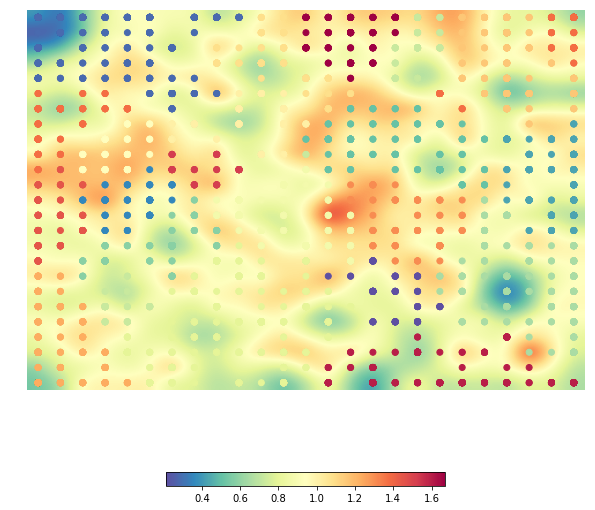

[[ 1  1  1  1  1  1  1  1  1  1 12 12 20 20 20 20 20  7  7 13 13 13 13 16
  16]
 [ 1  1  1  1  1  1  1  1  1  1 12 12 20 20 20 20 20  7  7 13 13 13 13 16
  16]
 [ 1  1  1  1  1  1  1  1 12 12 12 12 20 20 20 20  7  7  7 13 13 13 13 16
  16]
 [ 1  1  1  1  1  1  1 12 12 12 12 12 12 20 20 20  7  7  7 13 13 13 13 13
  16]
 [ 1  1  1  1  1  1  1  1 12 12 12 12 12 12 20  7  7  7  7 13 13 13 13 13
  13]
 [16 16 16 16  1  1  1  1  1 11 11 11 12 12 12  4  7  7 16 16 13 13 13 13
  13]
 [16 16 16 16 16  1  1 11 11 11 11 11 12 12  4  4  4  4 16 16 13 13 13 13
  13]
 [16 16 16 10 10 10 11 11 11 11 11 11 11  4  4  4  4  4  4  4  4 13 13  3
   3]
 [16 16 10 10 10 10 11 11 11 11 11 11  4  4  4  4  4  4  4  4  4  3  3  3
   3]
 [16 16 10 10 10 10 18 18 18 18 11 11  7  4  4  4  4  4  4  4  4  3  3  3
   3]
 [16 17 10 10 10  2 18 18 18 18 18  9  9  4  4  4  4  4  4  4  4  3  3  3
   3]
 [17 17 17  2  2  2  2 18 18 18 18  9  9  9 15 15 15  4  4  4  4  3  3  3
   3]
 [17 17  2  2  2  2  2  5  9  9  9  9  9

In [233]:
def cluster_report(som):
    som.view_umatrix(bestmatches=True, figsize=(10, 10), colorbar=True)
    print(som.clusters)
    
    cl_indices, counts = np.unique(som.clusters, return_counts=True)
    cl_cnt = np.vstack((cl_indices, counts))
    cl_cnt = cl_cnt[:, np.argsort(cl_cnt[1])]
    
    print("\nClusters sorted by increasing number of neurons:")
    print("First row : Cluster index\nSecond row : Number of neurons")
    print(cl_cnt)
    
cluster_report(som)


## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Έχουμε προσθέσει μια επιπλέον παράμετρο για να ορίζουμε πόσες απο τις καλύτερες ταινίες θέλουν να μας τυπώνονται.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών. Χρησιμοποιεί το ίδιο όρισμα με την `print_categories_stats` για να μπορεί να καλεστεί κατάλληλα, σε περίπτωση που θέλουμε να μας εμφανίζονται λιγότερα Genres.

In [234]:
import collections

def print_categories_stats(ids, max_genres=-1):
    total_categories = []
    print("Total Movies: ", len(ids))

    for iid in ids:
        cat = categories[iid][0]
        total_categories.extend([cat_i.strip()[1:-1] for cat_i in cat.split(",")])

    if max_genres:
        return [cat for cat in collections.Counter(total_categories).most_common()[:max_genres]]
    
    return collections.Counter(total_categories).most_common()[:max_genres]

def print_cluster_neurons_movies_report(cluster, max_genres=-1):
    neurons = []
    rows, columns = np.where(cluster == som.clusters)
    cluster_bmus = np.column_stack((columns, rows))
    
    return print_categories_stats(neuron_movies_report(cluster_bmus), max_genres)
    
def neuron_movies_report(cluster_bmus):
    ids = []
    bmus_str = np.array([np.array2string(bmun) for bmun in bmus])
    for cbmu in cluster_bmus:
        indices = np.where(bmus_str == np.array2string(cbmu))[0]
        
        for i in indices:
            ids.append(i)
        
    return(ids)

In [235]:
for cluster in range(best_k):
    print("Cluster: ", cluster)
    print(print_cluster_neurons_movies_report(cluster, 10), "-"*100, sep="\n")

Cluster:  0
Total Movies:  92
[('Animation', 71), ('Family Film', 57), ('Fantasy', 17), ('Adventure', 16), ("Children's/Family", 12), ('Comedy', 11), ("Children's", 10), ('Musical', 9), ('Comedy film', 7), ('Anime', 6)]
----------------------------------------------------------------------------------------------------
Cluster:  1
Total Movies:  816
[('Drama', 816), ('Black-and-white', 90), ('Indie', 70), ('War film', 56), ('Family Film', 41), ('Family Drama', 40), ('Biographical film', 39), ('Musical', 34), ('Period piece', 34), ('Melodrama', 33)]
----------------------------------------------------------------------------------------------------
Cluster:  2
Total Movies:  79
[('Action', 79), ('Comedy', 71), ('Action/Adventure', 60), ('Crime Fiction', 32), ('Parody', 14), ('Crime Comedy', 14), ('Heist', 10), ('Thriller', 10), ('Spy', 9), ('Indie', 9)]
----------------------------------------------------------------------------------------------------
Cluster:  3
Total Movies:  212
[('



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM
1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Θα απαντήσουμε 

1. Από τα αποτελέσματα που παραθέσαμε παραπάνω εύκολα διαπιστώνουμε ότι η κατηγορία που έχει το μεγαλύτερο συγκέντρωσης είναι το Drama. Ειδικότερα στον Cluster 1 που είναι και συγκεκριμένα ο cluster με τους περισσότερους νευρώνες στον χάρτη 760 στις 760 περίεχουν ανήκουν στην κατηγορία Drama. Υπάρχουν ωστόσο και άλλα cluster που εμφανίζουν την κατηγορία Drama σε υψηλά ποσοστά συγκέντρωσης όπως ο 15 και ο 11. Δεν είναι λοιπόν τυχαίο ότι η κατηγορία αυτή που κατέχει και την μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου απεικονίζεται με τους περισσότερους νευρώνες και στον χώρο μειωμένης διάστασης. Από την άλλη πλευρά παρατηρούμε και παρόμοια συμπεριφορά με λιγότερο συχνές κατηγορίες. Η κατηγορία World cinema που αποτελεί και την πολυπληθέστερη στον cluster 16, χαρακτηρίζει μονάχα 69 ταινιές, δηλαδή το 1.4% του dataset. Παρόμοια είναι και η συμπεριφορά της στον χώρο μειωμένων διαστάσεων, αφού καταλαμβάνει 7 νευρώνες, ακριβώς το 1.4%  του grid.

2,3.  Στον χάρτη οι κατηγορίες Horror, Thriller (14,7) βρίσκονται κάτω αριστερά στον χάρτη ενώ οι κατηγορίες World Cinema, Romance, Drama (1,16) βρίσκονται       πάνω αριστερά. Η λύση λοιπόν που επιστρέφει ο KMeans, ομαδοποιεί κοντινά πρότυπα εισόδου, και απομακρύνει ξένα μεταξύ τους. 